<a href="https://colab.research.google.com/github/paolayela/Talento-TECH/blob/main/Actividad6_unidad1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

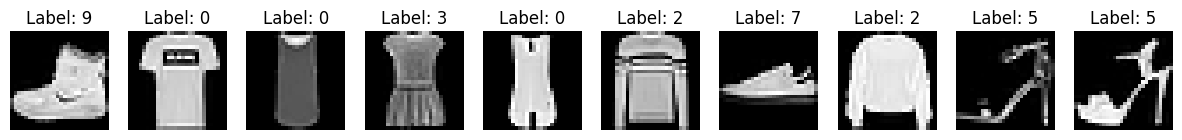

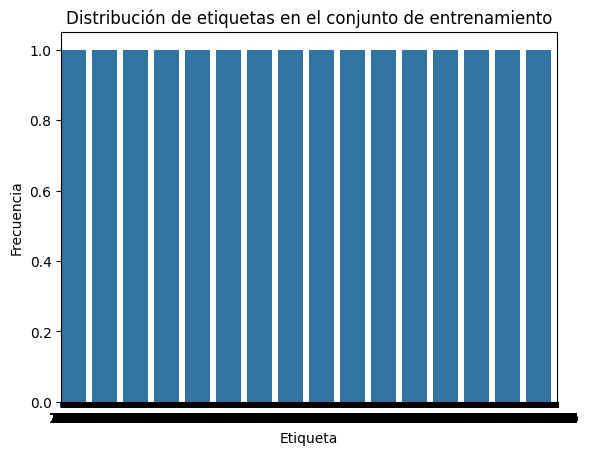

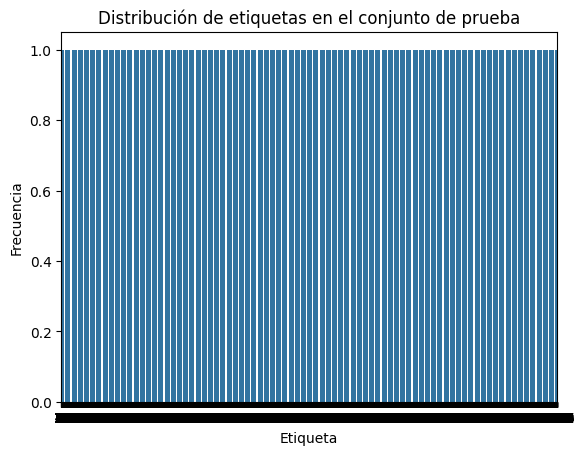

label Sandalia
imagen [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   3   1   0   0   1   1   0   0   0   0  58   0  39   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   3   0   0   0   0   0   0   0  64 109 146 192 193   7   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0  94  38  99 209 183 229 192 142  48   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0  41  45 158 146 164 114  51   1  53 105  42  36   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  10  68  44  30  59 172 146   0  22   0  13 103 111 103   0   0]
 [  0   0   0   0   0   0   0   0   0   3   1   0  22  61  88 152 255  71   0   0   0   0  35  85 112 201  44   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0  13  62 

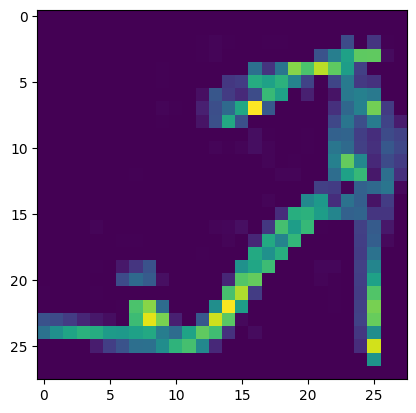

In [3]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#cargar el conjunto de datos
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

categorias={0:'Camiseta',1:'Pantalon',2:'Sueter',3:'Vestido',4:'Abrigo',5:'Sandalia',6:'Camisa',7:'Zapatilla de deporte',8:'Bolsa',9:'Botin'}

# Visualizar las primeras 10 imágenes de entrenamiento
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i in range(10):
    axes[i].imshow(train_images[i], cmap='gray')
    axes[i].set_title(f'Label: {train_labels[i]}')
    axes[i].axis('off')
plt.show()

# Distribución de etiquetas de entrenamiento
sns.countplot(train_labels)
plt.title('Distribución de etiquetas en el conjunto de entrenamiento')
plt.xlabel('Etiqueta')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de etiquetas de prueba
sns.countplot(test_labels)
plt.title('Distribución de etiquetas en el conjunto de prueba')
plt.xlabel('Etiqueta')
plt.ylabel('Frecuencia')
plt.show()

#visualizar un conjunto de datos
index=8
np.set_printoptions(linewidth=200)
print('label',categorias[train_labels[index]])
print('imagen',train_images[index])
plt.imshow(train_images[index])


#normalizar los datos
train_images = train_images / 255.0
test_images = test_images / 255.0



In [ ]:
#creacion del modelo
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

#compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

#entrenar el modelo
history=model.fit(train_images, train_labels, epochs=10,verbose=False)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1875/1875 - 3s - loss: 0.2194 - accuracy: 0.9184 - 3s/epoch - 2ms/step
perdida en el conjunto de entrenamiento: 0.2193833440542221
Precision en el conjunto de entrenamiento: 0.9184499979019165
313/313 - 1s - loss: 0.3382 - accuracy: 0.8846 - 697ms/epoch - 2ms/step
perdida en el conjunto de prueba: 0.3381730914115906
Precision en el conjunto de prueba: 0.8845999836921692


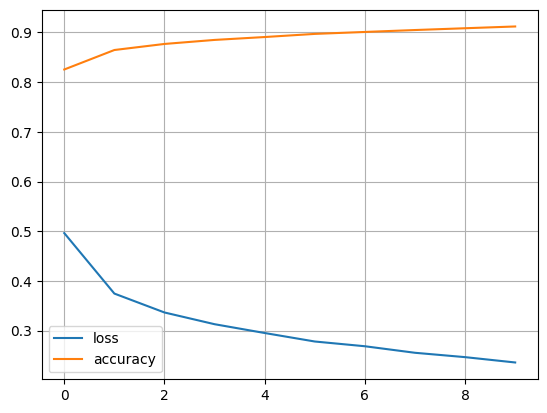

In [ ]:
#graficar el historial del modelo
import pandas as pd
pd.DataFrame(history.history).plot(grid=True)

#evaluar el modelo
test_loss, test_acc = model.evaluate(train_images, train_labels, verbose=2)
print('perdida en el conjunto de entrenamiento:', test_loss)
print('Precision en el conjunto de entrenamiento:', test_acc)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('perdida en el conjunto de prueba:', test_loss)
print('Precision en el conjunto de prueba:', test_acc)

In [ ]:
#Prediccion
print('label',categorias[test_labels[index]])
clasificacion=model.predict(test_images[index:index+1])
clasificacion=clasificacion.reshape(-1,1)
if clasificacion[0]>clasificacion[1] and clasificacion[0]>clasificacion[2] and clasificacion[0]>clasificacion[3] and clasificacion[0]>clasificacion[4] and clasificacion[0]>clasificacion[5] and clasificacion[0]>clasificacion[6] and clasificacion[0]>clasificacion[7] and clasificacion[0]>clasificacion[8]and clasificacion[0]>clasificacion[9]:
  print('clasificacion',categorias[0])
elif clasificacion[1]>clasificacion[0] and clasificacion[1]>clasificacion[2] and clasificacion[1]>clasificacion[3] and clasificacion[1]>clasificacion[4] and clasificacion[1]>clasificacion[5] and clasificacion[1]>clasificacion[6] and clasificacion[1]>clasificacion[7] and clasificacion[1]>clasificacion[8]and clasificacion[1]>clasificacion[9]:
    print('clasificacion',categorias[1])
elif clasificacion[2]>clasificacion[0] and clasificacion[2]>clasificacion[1] and clasificacion[2]>clasificacion[3] and clasificacion[2]>clasificacion[4] and clasificacion[2]>clasificacion[5] and clasificacion[2]>clasificacion[6] and clasificacion[2]>clasificacion[7] and clasificacion[2]>clasificacion[8]and clasificacion[2]>clasificacion[9]:
    print('clasificacion',categorias[2])
elif clasificacion[3]>clasificacion[0] and clasificacion[3]>clasificacion[1] and clasificacion[3]>clasificacion[2] and clasificacion[3]>clasificacion[4] and clasificacion[3]>clasificacion[5] and clasificacion[3]>clasificacion[6] and clasificacion[3]>clasificacion[7] and clasificacion[3]>clasificacion[8]and clasificacion[3]>clasificacion[9]:
    print('clasificacion',categorias[3])
elif clasificacion[4]>clasificacion[0] and clasificacion[4]>clasificacion[1] and clasificacion[4]>clasificacion[2] and clasificacion[4]>clasificacion[3] and clasificacion[4]>clasificacion[5] and clasificacion[4]>clasificacion[6] and clasificacion[4]>clasificacion[7] and clasificacion[4]>clasificacion[8]and clasificacion[4]>clasificacion[9]:
    print('clasificacion',categorias[4])
elif clasificacion[5]>clasificacion[0] and clasificacion[5]>clasificacion[1] and clasificacion[5]>clasificacion[2] and clasificacion[5]>clasificacion[3] and clasificacion[5]>clasificacion[4] and clasificacion[5]>clasificacion[6] and clasificacion[5]>clasificacion[7] and clasificacion[5]>clasificacion[8]and clasificacion[5]>clasificacion[9]:
    print('clasificacion',categorias[5])
elif clasificacion[6]>clasificacion[0] and clasificacion[6]>clasificacion[1] and clasificacion[6]>clasificacion[2] and clasificacion[6]>clasificacion[3] and clasificacion[6]>clasificacion[4] and clasificacion[6]>clasificacion[5] and clasificacion[6]>clasificacion[7] and clasificacion[6]>clasificacion[8]and clasificacion[6]>clasificacion[9]:
    print('clasificacion',categorias[6])
elif clasificacion[7]>clasificacion[0] and clasificacion[7]>clasificacion[1] and clasificacion[7]>clasificacion[2] and clasificacion[7]>clasificacion[3] and clasificacion[7]>clasificacion[4] and clasificacion[7]>clasificacion[5] and clasificacion[7]>clasificacion[6] and clasificacion[7]>clasificacion[8]and clasificacion[7]>clasificacion[9]:
    print('clasificacion',categorias[7])
elif clasificacion[8]>clasificacion[0] and clasificacion[8]>clasificacion[1] and clasificacion[8]>clasificacion[2] and clasificacion[8]>clasificacion[3] and clasificacion[8]>clasificacion[4] and clasificacion[8]>clasificacion[5] and clasificacion[8]>clasificacion[6] and clasificacion[8]>clasificacion[7]and clasificacion[8]>clasificacion[9]:
    print('clasificacion',categorias[8])
elif clasificacion[9]>clasificacion[0] and clasificacion[9]>clasificacion[1] and clasificacion[9]>clasificacion[2] and clasificacion[9]>clasificacion[3] and clasificacion[9]>clasificacion[4] and clasificacion[9]>clasificacion[5] and clasificacion[9]>clasificacion[6] and clasificacion[9]>clasificacion[7]and clasificacion[9]>clasificacion[8]:
    print('clasificacion',categorias[9])


label Sandalia
1/1 [==============================] - 0s 24ms/step
clasificacion Sandalia


label Zapatilla de deporte
imagen [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   1 

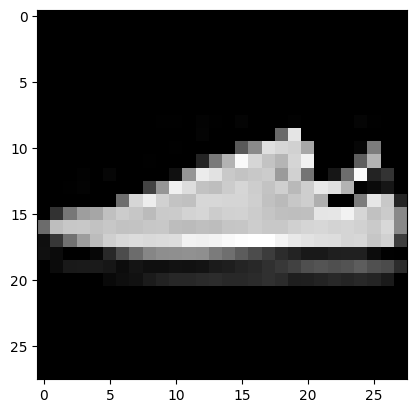

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 68)                8772      
                                                                 
 dense_14 (Dense)            (None, 10)                690       
                                                                 
Total params: 109942 (429.46 KB)
Trainable params: 109942 (429.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/4
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4954 - accuracy: 0.8249 - val_loss: 0.4338 - val_accuracy: 0.8409
Epo

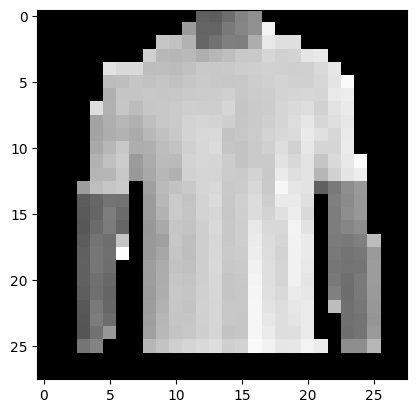

Forma del array de la imagen: (28, 28)
Valores de los píxeles de la imagen: [[  0   0   0   0   0   0   0   0   0   0   0   0  90  87 102 124 135   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 144  94  94 113 125 135 227   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 185 181 167  96 106 119 118 162 217 209 209   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 194 172 170 173 164 171 178 187 188 200 195 197 214 218   0   0   0   0   0   0]
 [  0   0   0   0   0 213 204 204 177 178 176 181 188 187 188 192 194 196 195 194 195 203 215   0   0   0   0   0]
 [  0   0   0   0   0 176 178 184 182 184 181 185 189 187 186 187 192 195 197 195 195 201 214 235   0   0   0   0]
 [  0   0   0   0   0 165 184 184 186 185 186 189 190 191 195 186 190 192 198 200 201 199 219 222   0   0   0   0]
 [  0   0   0   0 207 166 185 177 185 186 189 194 193 193 200 184 189 191 199 204 208 196 213 219   0   0   0   0]
 [  

In [ ]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
import cv2

# Cargar el conjunto de datos
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

categorias = {0: 'Camiseta', 1: 'Pantalon', 2: 'Sueter', 3: 'Vestido', 4: 'Abrigo', 5: 'Sandalia', 6: 'Camisa', 7: 'Zapatilla de deporte', 8: 'Bolsa', 9: 'Botin'}

# Visualizar un conjunto de datos
index = 6
np.set_printoptions(linewidth=200)
print('label', categorias[train_labels[index]])
print('imagen', train_images[index])
plt.imshow(train_images[index], cmap='gray')
plt.show()

# Normalizar los datos
train_images = train_images / 255.0
test_images = test_images / 255.0

# Creación del modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(68, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=4, verbose=True, validation_data=(test_images, test_labels))

# Evaluar el modelo en el conjunto de pruebas
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nPrecisión en el conjunto de prueba:', test_acc)

# Función para cambiar el fondo de una imagen a negro
def cambiar_fondo_a_negro(img):
    # Aplicar un umbral para crear una máscara
    _, mask = cv2.threshold(img, 240, 255, cv2.THRESH_BINARY)
    # Invertir la máscara
    mask_inv = cv2.bitwise_not(mask)
    # Crear una imagen con fondo negro
    img_con_fondo_negro = cv2.bitwise_and(img, img, mask=mask_inv)
    return img_con_fondo_negro

# Función para predecir la categoría de una nueva imagen
def predecir_categoria(ruta_imagen):
    # Cargar la imagen usando OpenCV
    img = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
    # Redimensionar la imagen a 28x28 píxeles
    img = cv2.resize(img, (28, 28))
    # Cambiar el fondo a negro
    img_con_fondo_negro = cambiar_fondo_a_negro(img)
    # Mostrar la imagen con fondo negro
    plt.imshow(img_con_fondo_negro, cmap='gray')
    plt.show()
    # Convertir la imagen a un array de numpy y escalar los valores de los píxeles
    img_array = np.array(img_con_fondo_negro) / 255.0
    # Verificar el array de la imagen
    print('Forma del array de la imagen:', img_con_fondo_negro.shape)
    print('Valores de los píxeles de la imagen:', img_con_fondo_negro)
    # Comparar con una imagen de entrenamiento
    #print('Valores de los píxeles de una imagen de entrenamiento:', train_images[index])
    # Expandir las dimensiones para que coincida con el formato de entrada del modelo
    img_array = np.expand_dims(img_array, axis=0)
    img_array = np.expand_dims(img_array, axis=-1)
    # Verificar el array expandido
    print('Forma del array expandido:', img_array.shape)
    # Realizar la predicción
    prediccion = model.predict(img_array)
    # Obtener la categoría con la mayor probabilidad
    categoria_index = np.argmax(prediccion)
    print('Índice de la categoría predicha:', categoria_index)

    # Mostrar el resultado
    print(f'La imagen es de la categoría: {categorias[categoria_index]}')

# Probar la función con una nueva imagen
# Nota: Reemplaza 'ruta/a/tu/imagen.png' con la ruta de la imagen que quieres predecir
ruta_imagen = 'camiseta.png'
predecir_categoria(ruta_imagen)


label Sandalia
imagen [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   3   1   0   0   1   1   0   0   0   0  58   0  39   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   3   0   0   0   0   0   0   0  64 109 146 192 193   7   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0  94  38  99 209 183 229 192 142  48   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0  41  45 158 146 164 114  51   1  53 105  42  36   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  10  68  44  30  59 172 146   0  22   0  13 103 111 103   0   0]
 [  0   0   0   0   0   0   0   0   0   3   1   0  22  61  88 152 255  71   0   0   0   0  35  85 112 201  44   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0  13  62 

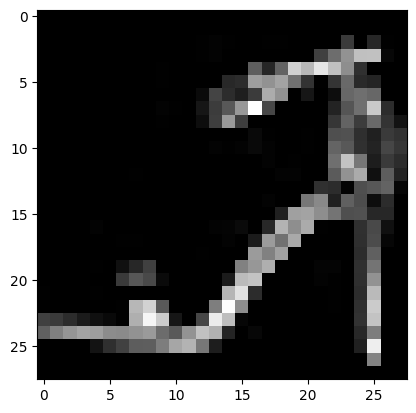

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 128)               100480    
                                                                 
 dense_22 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5048 - accuracy: 0.8219 - val_loss: 0.4305 - val_accuracy: 0.8453
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3783 - accuracy: 0.8640 - val_loss: 0.3935 - val_accuracy:

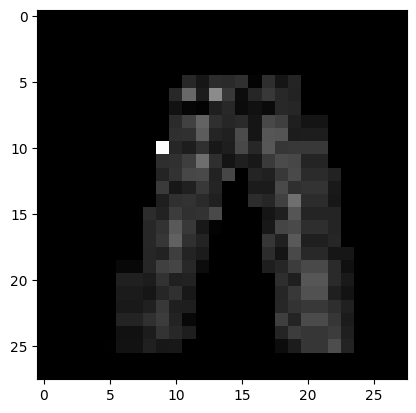

Forma del array de la imagen: (28, 28)
Valores de los píxeles de la imagen: [[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  37.  21.  42.  39.  46.   3.  43.  20.  34.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  38.  97.  26.

In [ ]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

# Cargar el conjunto de datos
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

categorias = {0: 'Camiseta', 1: 'Pantalon', 2: 'Sueter', 3: 'Vestido', 4: 'Abrigo', 5: 'Sandalia', 6: 'Camisa', 7: 'Zapatilla de deporte', 8: 'Bolsa', 9: 'Botin'}

# Visualizar un conjunto de datos
index = 8
np.set_printoptions(linewidth=200)
print('label', categorias[train_labels[index]])
print('imagen', train_images[index])
plt.imshow(train_images[index], cmap='gray')
plt.show()

# Normalizar los datos
train_images = train_images / 255.0
test_images = test_images / 255.0

# Creación del modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=5, verbose=True, validation_data=(test_images, test_labels))

# Evaluar el modelo en el conjunto de pruebas
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nPrecisión en el conjunto de prueba:', test_acc)



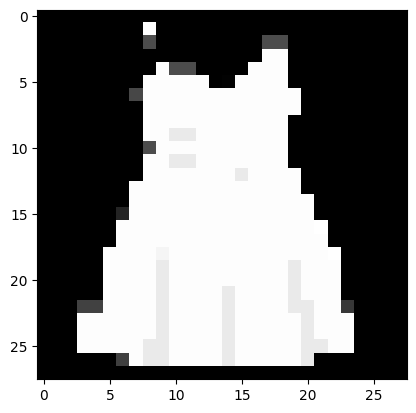

Forma del array de la imagen: (28, 28)
Valores de los píxeles de la imagen: [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 96.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 29.  0.  0.  0.  0.  0.  0.  0.  0. 29. 29.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 96. 96.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 96. 29. 29.  0.  0.  0.  0. 96. 96. 96.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 96. 96. 96. 96. 96.  0.  1. 96. 96. 96. 96.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 27. 96. 96. 96. 96. 96. 96. 96. 96. 96. 96. 96. 96.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 96. 96. 96. 96. 96. 96. 96. 96. 96. 96. 96. 96.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0

In [ ]:
# Función para cambiar el fondo de una imagen a negro usando numpy
def cambiar_fondo_a_negro(img):
    # Crear una máscara para los píxeles blancos
    mask = img > 240
    # Cambiar los píxeles blancos a negros
    img[mask] = 0
    return img

# Función para predecir la categoría de una nueva imagen
def predecir_categoria(ruta_imagen):
    # Cargar la imagen usando Keras
    img = image.load_img(ruta_imagen, target_size=(28, 28), color_mode="grayscale")
    # Convertir la imagen a un array de numpy
    img_array = image.img_to_array(img)
    # Convertir a escala de grises
    img_array = img_array.squeeze(axis=-1)
    # Cambiar el fondo a negro
    img_con_fondonegro = cambiar_fondo_a_negro(img_array)
    # Mostrar la imagen con fondo negro
    plt.imshow(img_con_fondonegro, cmap='gray')
    plt.show()
    # Escalar los valores de los píxeles
    img_con_fondo_negro = img_con_fondonegro / 255.0
    # Verificar el array de la imagen
    print('Forma del array de la imagen:', img_con_fondonegro.shape)
    print('Valores de los píxeles de la imagen:', img_con_fondonegro)
    # Comparar con una imagen de entrenamiento
    #print('Valores de los píxeles de una imagen de entrenamiento:', train_images[index])
    # Expandir las dimensiones para que coincida con el formato de entrada del modelo
    img_con_fondo_negro = np.expand_dims(img_con_fondo_negro, axis=0)
    img_con_fondo_negro = np.expand_dims(img_con_fondo_negro, axis=-1)
    # Verificar el array expandido
    print('Forma del array expandido:', img_con_fondo_negro.shape)
    # Realizar la predicción
    prediccion = model.predict(img_con_fondo_negro)
    # Obtener la categoría con la mayor probabilidad
    categoria_index = np.argmax(prediccion)
    print('Índice de la categoría predicha:', categoria_index)

    # Mostrar el resultado
    print(f'La imagen es de la categoría: {categorias[categoria_index]}')

# Probar la función con una nueva imagen
# Nota: Reemplaza 'ruta/a/tu/imagen.png' con la ruta de la imagen que quieres predecir
ruta_imagen = 'vestido.png'
predecir_categoria(ruta_imagen)